# Learning model data(TJM)

* Experience
* Region
* Category
* SuperMalter
* price

# Parsing 

In [2]:
# Del 
import pandas as pd

data = pd.read_csv('../../datasets/ml_data.csv')

# Drop unnecessary columns
try:
    data.drop(columns=['name', 'location', 'presentation', 'presentation', 'recommendations', 'city',
                     'teletravail_preference', 'missions', 'profil', 'link', 'skills', 'creation_date', 'response_time',
                     'response_rate', 'headline', 'profile_image', 'categories'], inplace=True)
except: 
    print("Columns already dropped")

data = data[data['experience'] != '-']
data = data[data['price'] != '0']
data.drop(columns=[ 'categories'], inplace=True)

Clean_csv = "../../datasets/ml_data.csv"
data.to_csv(Clean_csv, index=False)
data

Columns already dropped


,experience,price,supermalter,Region_Name
0,8-15 ans,550,0,bourgogne-franche-comté
1,8-15 ans,350,0,île-de-france
2,8-15 ans,900,0,auvergne-rhône-alpes
3,8-15 ans,1000,0,île-de-france
4,8-15 ans,600,0,nouvelle-aquitaine
...,...,...,...,...
24114,0-2 ans,130,0,hauts-de-france
24115,3-7 ans,350,0,île-de-france
24116,0-2 ans,150,0,île-de-france
24117,0-2 ans,125,0,île-de-france


# Outlier Management (Price)

In [19]:
import pandas as pd

data = pd.read_csv('../../datasets/ml_data.csv')

# View statistics in the 'Price' column
def view_price_statistics(x):
    prix_minimum = data['price'].min()
    prix_maximum = data['price'].max()
    prix_moyen = data['price'].mean()
    ecart_type = data['price'].std()

    return prix_minimum, prix_maximum, prix_moyen, ecart_type

view_price_statistics(data)


(0, 5000, 413.03851735146566, 249.98859906148846)

# Why ?

In [20]:
# Set a threshold(95e percentile)
threshold = data['price'].quantile(0.95)
# Data > Set a threshold
outliers = data[data['price'] > threshold]
# Analyser ces données
print(outliers.describe())


             price  supermalter
count  1202.000000  1202.000000
mean   1094.453411     0.021631
std     430.018459     0.145535
min     844.000000     0.000000
25%     900.000000     0.000000
50%    1000.000000     0.000000
75%    1150.000000     0.000000
max    5000.000000     1.000000


# Visualisation : Price Vs Experience

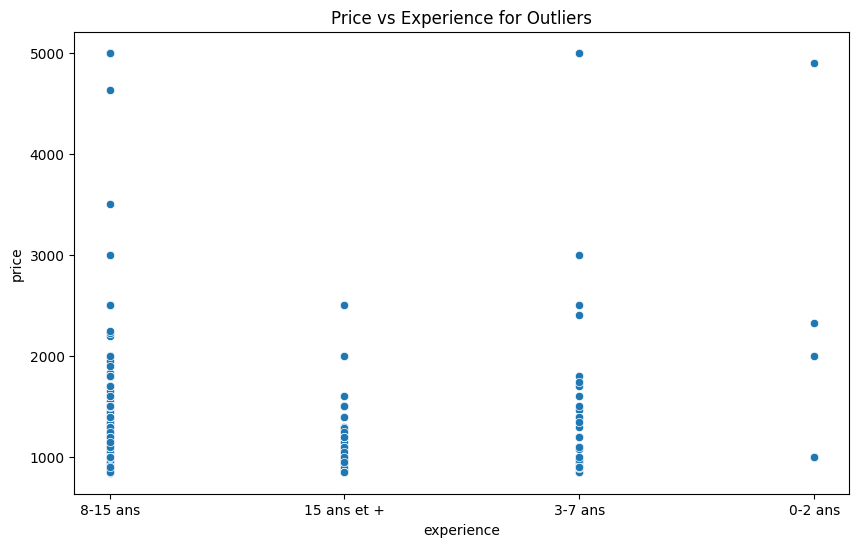

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='experience', y='price', data=outliers)
plt.title('Price vs Experience for Outliers')
plt.show()

# Price Vs Region ? 

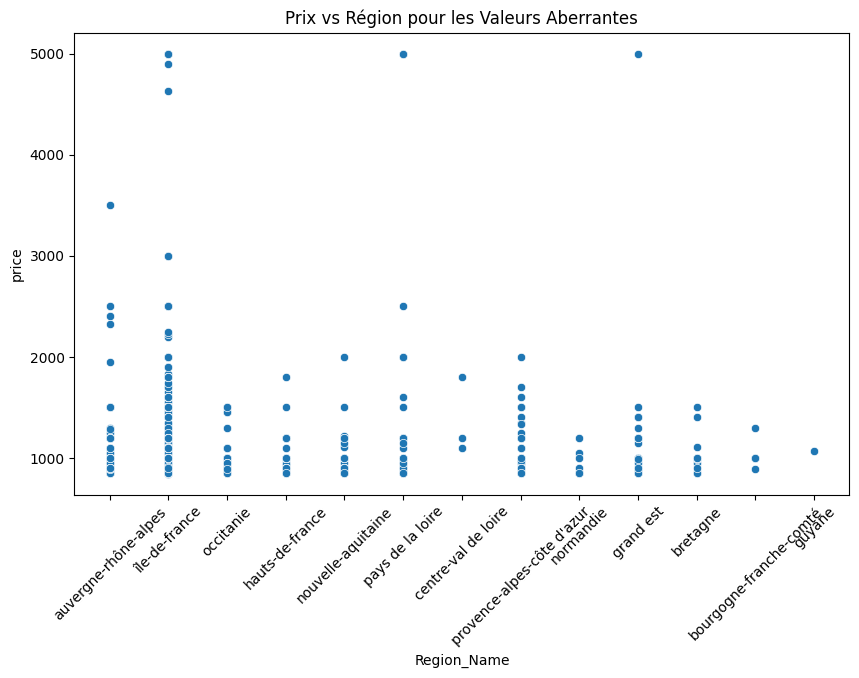

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Region_Name', y='price', data=outliers)
plt.title('Prix vs Région pour les Valeurs Aberrantes')
plt.xticks(rotation=45)
plt.show()